<br>
# ** 5-4 Finance Analysis**
Monte-Carlo Simulation

<br>
## ** 1 몬테카를로 시뮬레이션**
난수를 활용한 최적의 결과값 측정

In [1]:
import numpy as np
Trials    = 10000
student   = 30
SameBirth = 0

In [2]:
year = [0] * 365
year[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [3]:
new_Day        = np.random.randint(365)
new_Day

34

In [4]:
year[new_Day] += 1

In [5]:
have_SameBday  = False 

In [6]:
# Full Coding
for trial in range(Trials):
    year = [0] * 365           
    
    for i in range(student):
        new_Day        = np.random.randint(365)  
        year[new_Day] += 1     
        have_SameBday  = False 
        
    for num in year:
        if num > 1:            
            have_SameBday = True

    if have_SameBday == True:
        SameBirth += 1
    prob = float(SameBirth) / float(Trials)
        
    if trial % 999 == 0:
        print("{:4}\'th test {} 명중 2명의 생일이 같을확률 : {}".format(trial, student, prob))

   0'th test 30 명중 2명의 생일이 같을확률 : 0.0001
 999'th test 30 명중 2명의 생일이 같을확률 : 0.0727
1998'th test 30 명중 2명의 생일이 같을확률 : 0.1389
2997'th test 30 명중 2명의 생일이 같을확률 : 0.2076
3996'th test 30 명중 2명의 생일이 같을확률 : 0.2766
4995'th test 30 명중 2명의 생일이 같을확률 : 0.3454
5994'th test 30 명중 2명의 생일이 같을확률 : 0.4158
6993'th test 30 명중 2명의 생일이 같을확률 : 0.4896
7992'th test 30 명중 2명의 생일이 같을확률 : 0.5594
8991'th test 30 명중 2명의 생일이 같을확률 : 0.6292
9990'th test 30 명중 2명의 생일이 같을확률 : 0.6987


<br>
## **2 금융상품들의 포트폴리오 평가**
몬테카를로 시뮬레이션 금융에 적용하기
1. 평균수익
1. 주가변동성 (std)
1. Sharpe ratio

<br>
### **01 데이터 불러오기**
pandas datareader

In [7]:
# from pandas_datareader import get_data_yahoo
# start_date = '2013-01-01'
# codes = ['KO', 'MS', '005930.KS', '000660.KS']
# result = {}
# for code in codes:
#     result[code] = get_data_yahoo(code, start_date).Close

# import pandas as pd
# prices = pd.DataFrame(result)

# prices = prices.fillna(method='ffill')
# prices = prices.dropna()                
# prices.to_csv('./data/stocks.csv', encoding="ms949")
# prices.tail(3)

In [8]:
# 저장된 CSV 파일을 사용한다

import pandas as pd
prices = pd.read_csv('./data/stocks.csv')
prices = prices.set_index('Date')
prices.head(3)
prices.index = pd.DatetimeIndex(prices.index)
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1410 entries, 2013-01-02 to 2018-06-11
Data columns (total 4 columns):
KO           1410 non-null float64
MS           1410 non-null float64
005930.KS    1410 non-null float64
000660.KS    1410 non-null float64
dtypes: float64(4)
memory usage: 55.1 KB


<br>
### **02 임의의 확률에 근거한 포트폴리오 수익률 계산**
Portfolio Rate

In [9]:
import pandas as pd
import numpy as np

In [10]:
portfolio_rate     = [0.5, 0.2, 0.2, 0.1]
portfolio_rate

[0.5, 0.2, 0.2, 0.1]

In [11]:
returns            = prices.pct_change()
returns.head(4)

,KO,MS,005930.KS,000660.KS
Date,,,,
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,0.000000,-0.002039,-0.020939,0.001880
2013-01-04,0.001596,0.031154,-0.011666,-0.011257
2013-01-07,-0.009559,-0.019317,-0.003279,-0.017078


In [12]:
cov_returns        = returns.cov()
cov_returns

,KO,MS,005930.KS,000660.KS
KO,0.000076,0.000040,0.000006,0.000007
MS,0.000040,0.000269,0.000019,0.000033
005930.KS,0.000006,0.000019,0.000248,0.000111
000660.KS,0.000007,0.000033,0.000111,0.000423


In [13]:
mean_daily_returns = returns.mean()
mean_daily_returns

KO           0.000149
MS           0.000825
005930.KS    0.000450
000660.KS    0.001071
dtype: float64

In [14]:
weights            = np.asarray(portfolio_rate)
weights 

array([0.5, 0.2, 0.2, 0.1])

In [15]:
portfolio_return   = round(np.sum(
    mean_daily_returns * weights) * 252, 2)   
portfolio_return

0.11

In [16]:
portfolio_std_dev  = round(np.sqrt(
    np.dot(weights.T, 
           np.dot(cov_returns, weights)) ) * np.sqrt(252), 2) 
portfolio_std_dev

0.12

In [17]:
print(' 분산비율 : {} \n1) 연간 수익 : +- {} \n2) 변동률 : {}'.format(
    portfolio_rate, portfolio_return, portfolio_std_dev))

 분산비율 : [0.5, 0.2, 0.2, 0.1] 
1) 연간 수익 : +- 0.11 
2) 변동률 : 0.12


<br>
### **03 몬테카를로 시뮬레이션을 활용한  포트폴리오 평가**

In [18]:
returns            = prices.pct_change()
cov_returns        = returns.cov()      
mean_daily_returns = returns.mean()
num_portfolios     = 25000   

In [19]:
results            = np.zeros((3 + len(prices.columns), num_portfolios))
results

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
weights  = np.random.random(len(prices.columns))
weights

array([0.63852501, 0.91853477, 0.17453228, 0.77301231])

In [21]:
for i in range(num_portfolios):
    weights  = np.random.random(len(prices.columns))
    weights /= np.sum(weights)             
    
    portfolio_return  = np.sum(
        mean_daily_returns * weights) * 252       

    portfolio_std_dev = np.sqrt(              
        np.dot(weights.T, np.dot(cov_returns, weights))) * np.sqrt(252)   

    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = results[0,i]/results[1,i]

    for j in range(len(weights)):           
        results[j+3, i] = weights[j]           
    
results_frame = pd.DataFrame(results.T, 
                             columns = ['ret','stdev','sharpe', 
                                        prices.columns[0], 
                                        prices.columns[1], 
                                        prices.columns[2], 
                                        prices.columns[3]])
results_frame.head()

,ret,stdev,sharpe,KO,MS,005930.KS,000660.KS
0,0.108389,0.124628,0.869704,0.489470,0.147624,0.246638,0.116269
1,0.142586,0.143982,0.990307,0.382315,0.387711,0.092246,0.137727
2,0.146331,0.153358,0.954178,0.299571,0.124053,0.295423,0.280953
3,0.161794,0.150527,1.074846,0.306485,0.314522,0.110982,0.268012
4,0.134081,0.140563,0.953887,0.340586,0.363328,0.218288,0.077798


In [22]:
results_frame.shape

(25000, 7)

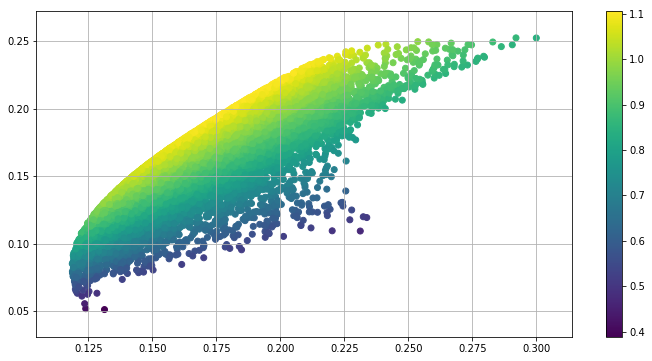

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(results_frame.stdev, 
            results_frame.ret,  
            c = results_frame.sharpe)
plt.grid(); plt.colorbar()

<br>
### **04 몬테카를로 포트폴리오 최적값 계산**
1. 샤프지수 최대인 포트폴리오
1. 표준편차 최소인 포트폴리오 

In [24]:
results_frame.head()

,ret,stdev,sharpe,KO,MS,005930.KS,000660.KS
0,0.108389,0.124628,0.869704,0.489470,0.147624,0.246638,0.116269
1,0.142586,0.143982,0.990307,0.382315,0.387711,0.092246,0.137727
2,0.146331,0.153358,0.954178,0.299571,0.124053,0.295423,0.280953
3,0.161794,0.150527,1.074846,0.306485,0.314522,0.110982,0.268012
4,0.134081,0.140563,0.953887,0.340586,0.363328,0.218288,0.077798


In [25]:
results_frame['sharpe'].idxmax()

12878

In [26]:
results_frame.iloc[results_frame['sharpe'].idxmax() , :]

ret          0.208073
stdev        0.187955
sharpe       1.107036
KO           0.064576
MS           0.456936
005930.KS    0.118130
000660.KS    0.360358
Name: 12878, dtype: float64

In [27]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
min_vol_port    = results_frame.iloc[results_frame['stdev'].idxmin()] 
min_vol_port  

ret          0.084974
stdev        0.118748
sharpe       0.715582
KO           0.668811
MS           0.091689
005930.KS    0.152038
000660.KS    0.087462
Name: 22323, dtype: float64

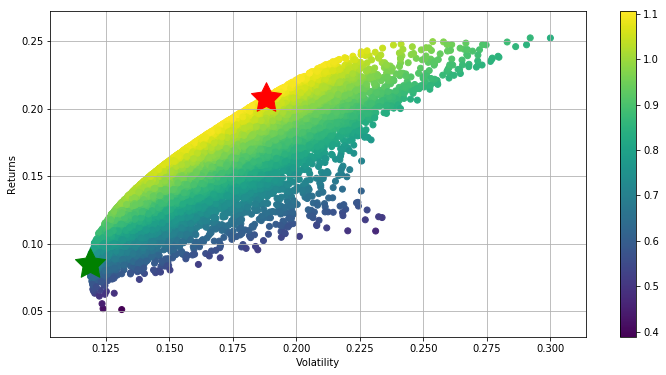

In [28]:
plt.figure(figsize=(12,6)); plt.grid()
plt.scatter(results_frame.stdev, 
            results_frame.ret,
            c = results_frame.sharpe)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

plt.scatter(max_sharpe_port[1], max_sharpe_port[0],
            marker = (5,1,0), color = 'r', s = 1000)

plt.scatter(min_vol_port[1],  min_vol_port[0],
            marker = (5,1,0), color = 'g', s = 1000)

In [29]:
print(max_sharpe_port)

ret          0.208073
stdev        0.187955
sharpe       1.107036
KO           0.064576
MS           0.456936
005930.KS    0.118130
000660.KS    0.360358
Name: 12878, dtype: float64


In [30]:
print(min_vol_port)

ret          0.084974
stdev        0.118748
sharpe       0.715582
KO           0.668811
MS           0.091689
005930.KS    0.152038
000660.KS    0.087462
Name: 22323, dtype: float64
